In [1]:
import pandas as pd
import numpy as np
import datasets
import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from baseline01  import Baseline01
from baseline02  import Baseline02SMA
from baseline02  import Baseline02EWMA
from IPython.display import display

In [2]:
#### EURUSD 2016 DS3 test dataset

In [3]:
# load  dataset
lookahead=1
dataset = 'DS3'
window=25
sym='EURUSD'
year=2016
title = sym + " " + str(year)
X_test, Y_test, prices_test = datasets.load(datasets.filename(dataset, lookahead, window, sym, year))

EURUSD 2016: f1-score: 0.511, mean future return: 0.015 bps, (0.015 bps), annualized future return 0.772 (0.775)


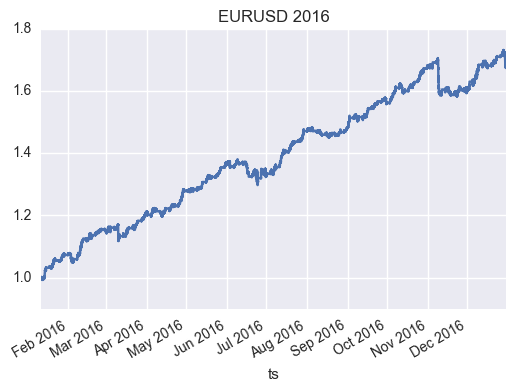

In [4]:
model = Baseline01(lookahead=1)
Y_test_pred = 1.0 - model.predict(prices_test)
metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, cum_return_plot=True);

EURUSD 2016: f1-score: 0.524, mean future return: 0.001 bps, (0.001 bps), annualized future return 0.034 (0.032)


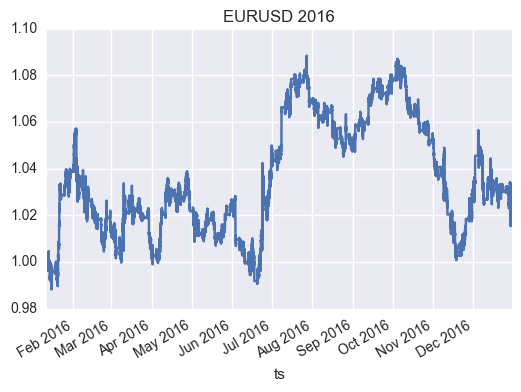

In [5]:
model = Baseline02SMA(lookahead=1, window=3601)
Y_test_pred = 1.0-model.predict(prices_test)
metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, cum_return_plot=True, heatmap=False);


EURUSD 2016: f1-score: 0.529, mean future return: 0.004 bps, (0.004 bps), annualized future return 0.162 (0.159)


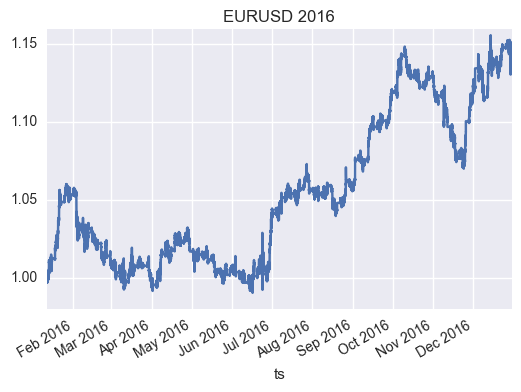

In [6]:
model = Baseline02EWMA(lookahead=1, centre_of_mass=2701)
Y_test_pred = 1.0-model.predict(prices_test)
metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, cum_return_plot=True, heatmap=False);


---------------

#### EURUSD 2016 DS3T test dataset

In [7]:
# load test dataset
lookahead=1
dataset = 'DS3T'
window=25
sym='EURUSD'
year=2016
title = sym + " " + str(year)
X_test, Y_test, prices_test = datasets.load(datasets.filename(dataset, lookahead, window, sym, year))

EURUSD 2016: f1-score: 0.516, mean future return: 0.015 bps, (0.015 bps), annualized future return 0.772 (0.775)


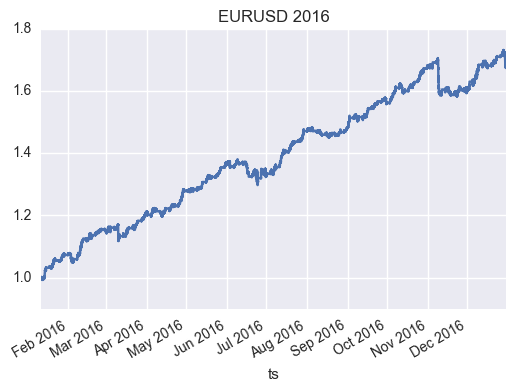

In [8]:
model = Baseline01(lookahead=1)
Y_test_pred = 1.0 - model.predict(prices_test)
metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, cum_return_plot=True);

EURUSD 2016: f1-score: 0.506, mean future return: 0.004 bps, (0.004 bps), annualized future return 0.173 (0.173)


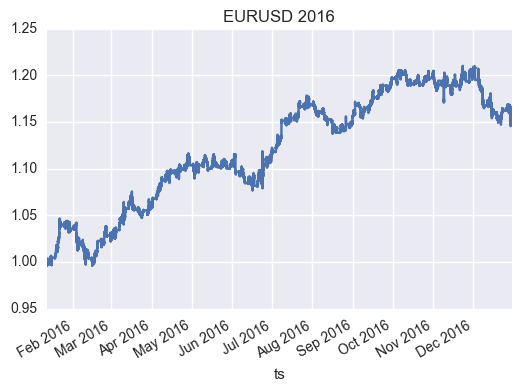

In [15]:
model = Baseline02SMA(lookahead=1, window=1000)
Y_test_pred = 1.0 - model.predict(prices_test)
metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, cum_return_plot=True, heatmap=False);


('Best centre-of-mass: ', 1000)
EURUSD 2016: f1-score: 0.506, mean future return: 0.006 bps, (0.006 bps), annualized future return 0.247 (0.246)


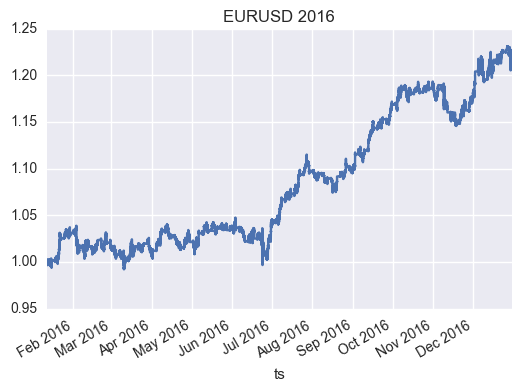

In [10]:
best = None
best_w = None
for w in range(10,1010,10):
    model = Baseline02EWMA(lookahead=1, centre_of_mass=w)
    Y_test_pred = 1.0 - model.predict(prices_test)
    m = metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, no_print=True);
    if best is None or m['f1_score'] > best['f1_score']:
        best_w = w

print("Best centre-of-mass: ", best_w)
model = Baseline02EWMA(lookahead=1, centre_of_mass=best_w)
Y_test_pred = 1.0 - model.predict(prices_test)
metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, cum_return_plot=True, heatmap=False);
